In [1]:
import pynm
import numpy as np
import pandas as pd
from pynm.pynm import PyNM
import seaborn as sns

import torch
import numpy as np
from data import Task1Data, Task2Data, Task3Data
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
norm_dataset = Task1Data()
abide_dataset = Task2Data()


(712, 62, 2) (712,) (712,)
(999, 62, 2) (999,) (999,)
(649, 62, 2) (649,) (649,)
Finding files: 2360/2360/2360
Finding files: 1031/1031/1031


In [3]:
ct = norm_dataset.ct_feas[...,0]
ages = norm_dataset.ages
sexs = norm_dataset.sexs

<Axes: xlabel='age', ylabel='fea'>

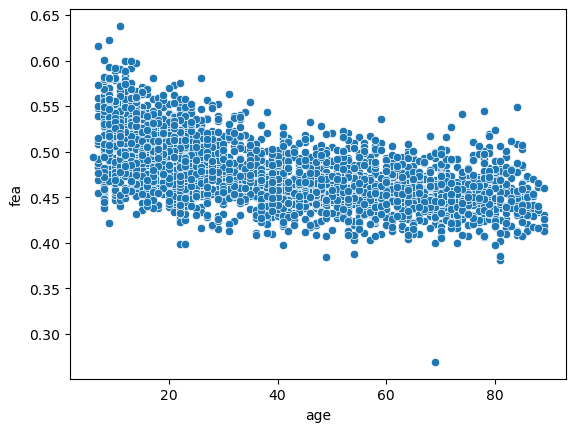

In [4]:
df = pd.DataFrame()
df['fea'] = np.concatenate([norm_dataset.ct_feas[...,0][:,20], abide_dataset.ct_feas[...,0][:,20]])
df['age'] = np.concatenate([norm_dataset.ages, abide_dataset.ages])
df['sex'] = np.concatenate([norm_dataset.sexs, abide_dataset.sexs]) #sexs
df['male'] = 1 -df['sex']
df['group'] = [0] * len(norm_dataset.ct_feas) + [1] * len(abide_dataset.ct_feas)
sns.scatterplot(x='age',y='fea',data=df)

# df = pd.DataFrame()
# df['fea'] = ct[:,20]
# df['age'] = ages
# df['sex'] = sexs
# df['male'] = 1 -sexs
# df['group'] = 0
# sns.scatterplot(x='age',y='fea',data=df)

In [5]:
m = PyNM(df,'fea','group',confounds = ['age','sex'],bin_spacing=1,bin_width=7,train_sample=1)

Models will be fit on full set of controls.


In [6]:
m.gamlss_normative_model(mu='fea ~ ps(age*sex)+ps(age*male)',sigma = '~ ps(age)')

GAMLSS-RS iteration 1: Global Deviance = -9993.701 
GAMLSS-RS iteration 2: Global Deviance = -10486.79 
GAMLSS-RS iteration 3: Global Deviance = -10601.68 
GAMLSS-RS iteration 4: Global Deviance = -10636.28 
GAMLSS-RS iteration 5: Global Deviance = -10648.79 
GAMLSS-RS iteration 6: Global Deviance = -10653.65 
GAMLSS-RS iteration 7: Global Deviance = -10655.84 
GAMLSS-RS iteration 8: Global Deviance = -10656.78 
GAMLSS-RS iteration 9: Global Deviance = -10657.2 
GAMLSS-RS iteration 10: Global Deviance = -10657.41 
GAMLSS-RS iteration 11: Global Deviance = -10657.51 
GAMLSS-RS iteration 12: Global Deviance = -10657.55 
GAMLSS-RS iteration 13: Global Deviance = -10657.57 
GAMLSS-RS iteration 14: Global Deviance = -10657.58 
GAMLSS-RS iteration 15: Global Deviance = -10657.59 
GAMLSS-RS iteration 16: Global Deviance = -10657.59 
GAMLSS-RS iteration 17: Global Deviance = -10657.59 
GAMLSS-RS iteration 18: Global Deviance = -10657.59 


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write t

In [7]:
m.data

,fea,age,sex,male,group,GAMLSS_pred,GAMLSS_sigma,GAMLSS_residuals,GAMLSS_z
0,0.4502,39,1.0,0.0,0,0.462685,-3.751476,-0.012485,0.003328
1,0.4270,51,0.0,1.0,0,0.458363,-3.814740,-0.031363,0.008221
2,0.4832,69,0.0,1.0,0,0.451748,-3.762367,0.031452,-0.008360
3,0.5038,43,0.0,1.0,0,0.462509,-3.778818,0.041291,-0.010927
4,0.5144,21,0.0,1.0,0,0.488687,-3.744868,0.025713,-0.006866
...,...,...,...,...,...,...,...,...,...
3386,0.5204,11,1.0,0.0,1,0.497827,-3.931978,0.022573,-0.005741
3387,0.5734,7,0.0,1.0,1,0.500729,-4.051558,0.072671,-0.017937
3388,0.5168,11,0.0,1.0,1,0.499134,-3.931978,0.017666,-0.004493
3389,0.5472,9,1.0,0.0,1,0.498613,-3.988571,0.048587,-0.012181


In [8]:
m.data['GAMLSS_pred'].values

array([0.46268513, 0.45836279, 0.45174755, ..., 0.49913437, 0.4986135 ,
       0.49678671])

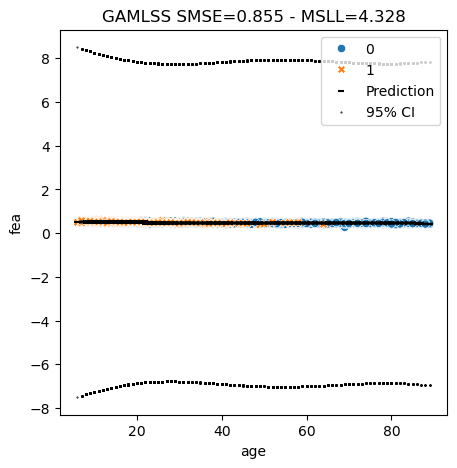

In [9]:
m.plot()

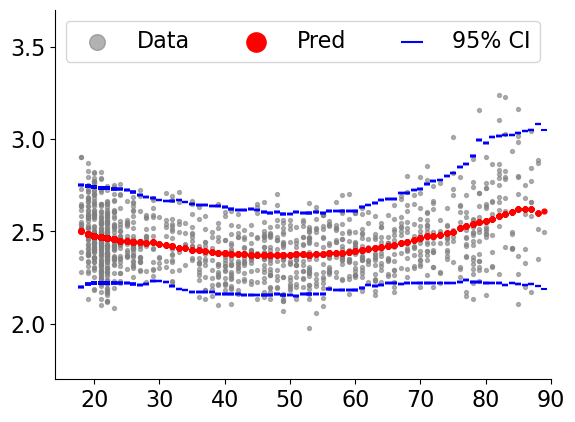

In [126]:
fig, ax = plt.subplots()


plt.scatter(m.data[m.data['sex']==1]['age'], m.data[m.data['sex']==1]['fea'],color='grey',alpha=0.6,s=8,label = 'Data')

plt.scatter(m.data[m.data['sex']==1]['age'], m.data[m.data['sex']==1]['LOESS_pred'],color='red',marker='o',s=12,label = 'Pred')
plt.scatter(m.data[m.data['sex']==1]['age'], m.data[m.data['sex']==1]['Centiles_5'],color='blue',marker='_',s=16,label='95% CI')
plt.scatter(m.data[m.data['sex']==1]['age'], m.data[m.data['sex']==1]['Centiles_95'],color='blue',marker='_',s=16)


# 去掉上边框和右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
from matplotlib.ticker import MultipleLocator

ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.xlim([14,90])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([1.7,3.7])
plt.legend(markerscale=4,fontsize=16,ncol=3,loc=1)

In [136]:
mid = m.data[m.data['sex']==1][(m.data['age'] > 40) & (m.data.age < 60) ]['fea']
old = m.data[m.data['sex']==1][(m.data['age'] > 70)]['fea']

Text(0.5, 0, '')

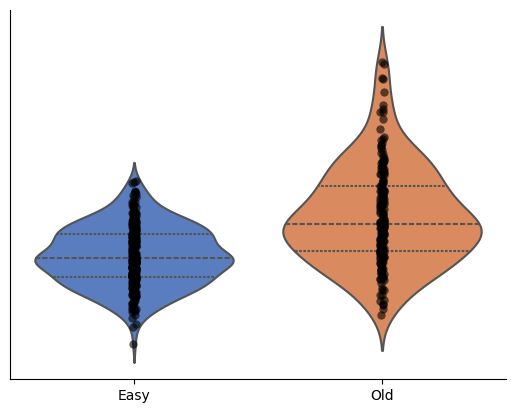

In [155]:
import pandas as pd
import seaborn as sns

# 创建 DataFrame
df = pd.DataFrame({
    'Value': list(mid) + list(old),
    'Group': ['Easy'] * len(mid) + ['Old'] * len(old)
})
fig, ax = plt.subplots()

# 绘制小提琴图
sns.violinplot(x='Group', y='Value', data=df, palette='muted',inner='quartile', linewidth=1.5,)
sns.stripplot(x='Group', y='Value', data=df, color='black', size=6, jitter=0.01, alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.yticks([])
plt.ylabel('')
plt.xlabel('')

In [135]:
df

,Value,Group
0,2.536,Group 1
1,2.345,Group 1
2,2.453,Group 1
3,2.469,Group 1
4,2.278,Group 1
...,...,...
319,2.318,Group 1
320,2.531,Group 1
321,2.634,Group 1
322,2.371,Group 1


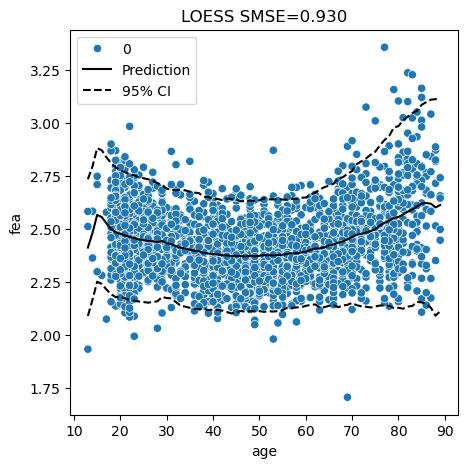

In [9]:
m.plot()

In [32]:
m.gamlss_normative_model(mu = 'fea ~ ps(age*sex)',
                        sigma = '~ ps(age)')

GAMLSS-RS iteration 1: Global Deviance = -1447.59 
GAMLSS-RS iteration 2: Global Deviance = -1965.54 
GAMLSS-RS iteration 3: Global Deviance = -2094.443 
GAMLSS-RS iteration 4: Global Deviance = -2132.937 
GAMLSS-RS iteration 5: Global Deviance = -2146.024 
GAMLSS-RS iteration 6: Global Deviance = -2150.904 
GAMLSS-RS iteration 7: Global Deviance = -2152.916 
GAMLSS-RS iteration 8: Global Deviance = -2153.811 
GAMLSS-RS iteration 9: Global Deviance = -2154.227 
GAMLSS-RS iteration 10: Global Deviance = -2154.429 
GAMLSS-RS iteration 11: Global Deviance = -2154.537 
GAMLSS-RS iteration 12: Global Deviance = -2154.596 
GAMLSS-RS iteration 13: Global Deviance = -2154.631 
GAMLSS-RS iteration 14: Global Deviance = -2154.652 
GAMLSS-RS iteration 15: Global Deviance = -2154.664 
GAMLSS-RS iteration 16: Global Deviance = -2154.673 
GAMLSS-RS iteration 17: Global Deviance = -2154.678 
GAMLSS-RS iteration 18: Global Deviance = -2154.682 
GAMLSS-RS iteration 19: Global Deviance = -2154.685 
GAML

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write t

In [35]:
m.plot?

Signature: m.plot(kind=None, gp_xaxis=None, gamlss_xaxis=None)
Docstring:
Plot the data with the normative model overlaid.

Parameters
----------
kind: list, default=None
    Type of plot, must be a valid subset of ["Centiles","LOESS","GP","GAMLSS"] or None. If None, all available
    results will be plotted, if None are available a warning will be raised and only the data will be plotted.
gp_xaxis: str,default=None
    Which confound to use for xaxis of GP plot. If set to None, first confound in list passed to model will be used.
gamlss_xaxis: str,default=None
    Which confound to use for xaxis of GAMLSS plot. If set to None, first confound in list passed to model will be used.

Raises
------
ValueError
    Plot kind not recognized, must be a valid subset of ["Centiles","LOESS","GP","GAMLSS"] or None.
File:      ~/miniconda3/lib/python3.12/site-packages/pynm/pynm.py
Type:      method

In [40]:
m.data

,fea,age,sex,group,GAMLSS_pred,GAMLSS_sigma,GAMLSS_residuals,GAMLSS_z
0,2.283,39,1.0,0,2.353564,-2.027645,-0.070564,0.034801
1,2.420,51,0.0,0,2.392180,-2.026287,0.027820,-0.013729
2,2.506,69,0.0,0,2.392180,-1.860440,0.113820,-0.061179
3,2.352,43,0.0,0,2.392180,-2.027966,-0.040180,0.019813
4,2.485,21,0.0,0,2.392180,-1.868198,0.092820,-0.049684
...,...,...,...,...,...,...,...,...
2355,2.453,28,0.0,0,2.392180,-1.984644,0.060820,-0.030645
2356,2.361,20,0.0,0,2.392180,-1.843340,-0.031180,0.016915
2357,2.606,21,0.0,0,2.392180,-1.868198,0.213820,-0.114452
2358,2.690,45,0.0,0,2.392180,-2.027849,0.297820,-0.146865


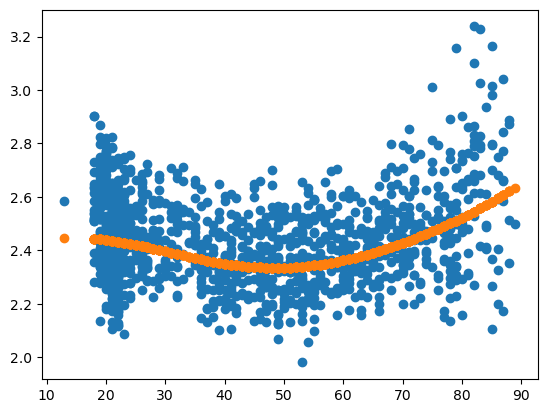

In [45]:
plt.scatter(m.data['age'][m.data['sex']==1], m.data[m.data['sex']==1]['fea'])
plt.scatter(m.data['age'][m.data['sex']==1], m.data[m.data['sex']==1]['GAMLSS_pred'])


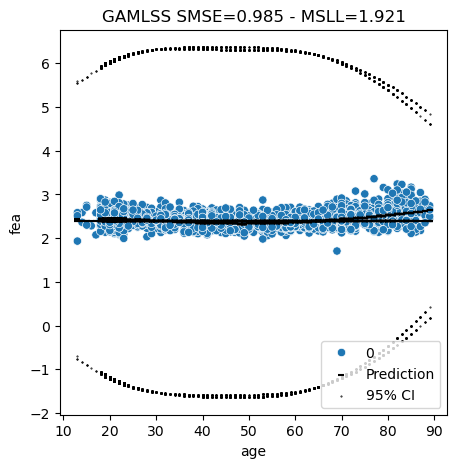

In [37]:
# Plot the data, model prediction, & 95% confidence interval
ax = m.plot()
# m.plot_res()

# Plot the z-scores of the model (model residuals / std deviation)
# m.plot_z(confound='age')

In [46]:
m.gp_normative_model(length_scale_bounds='fixed',length_scale=20)

Epoch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.89it/s]


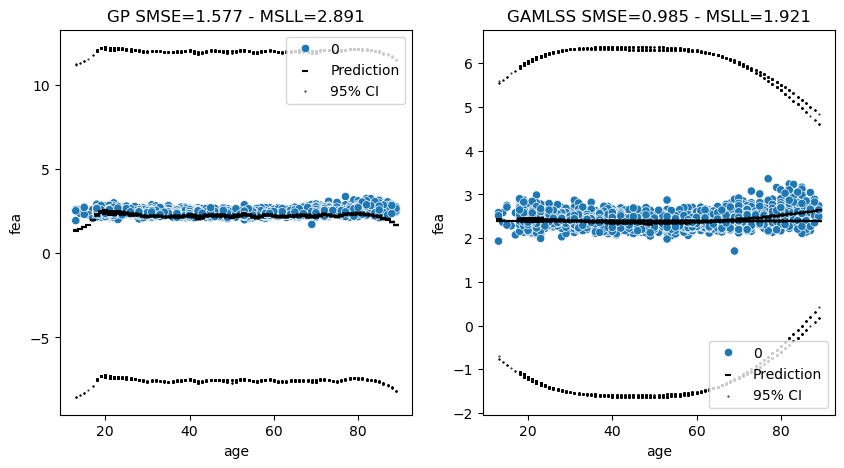

In [47]:
m.plot()


In [22]:
m.loess_normative_model()
m.gp_normative_model(length_scale_bounds='fixed',length_scale=20)
m.gamlss_normative_model(mu = "fea ~ cs(age)", sigma = "~ cs(age,df=2)", family='NO2')

Epoch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.69it/s]


GAMLSS-RS iteration 1: Global Deviance = -9847.128 
GAMLSS-RS iteration 2: Global Deviance = -9847.024 
GAMLSS-RS iteration 3: Global Deviance = -9847.023 


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write t

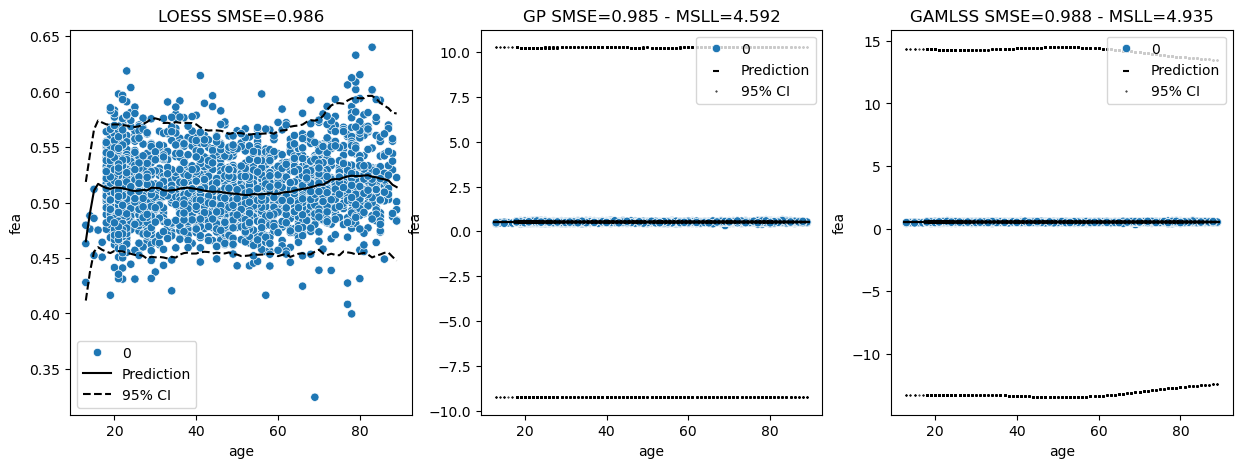

In [28]:
m.plot()
# m.plot_res()

# m.plot_z()

In [28]:
m.loess_normative_model()
m.centiles_normative_model()
m.gp_normative_model()

/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:513: UserWarning: The residuals are not Gaussian!
  warnings.warn("The residuals are not Gaussian!")


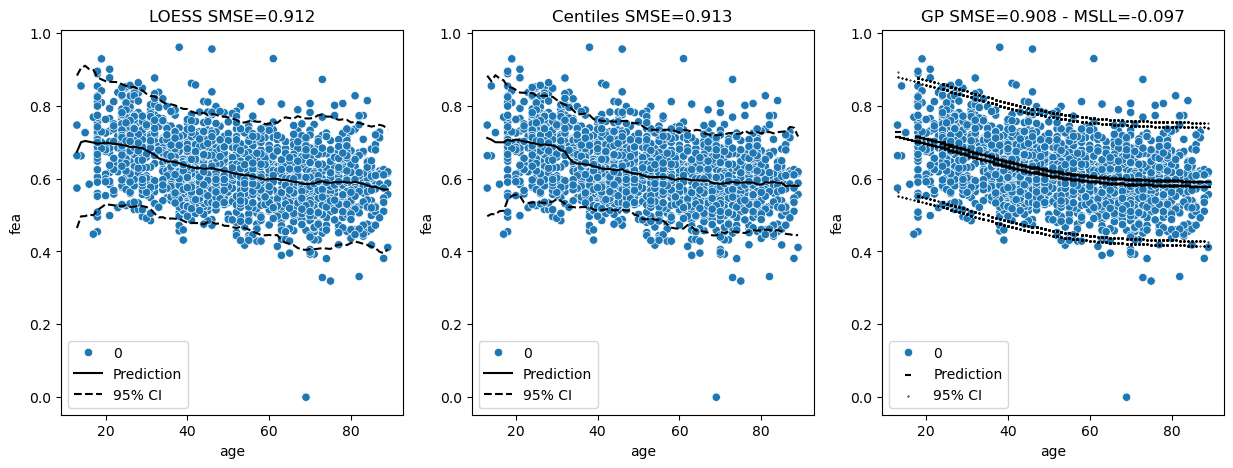

/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


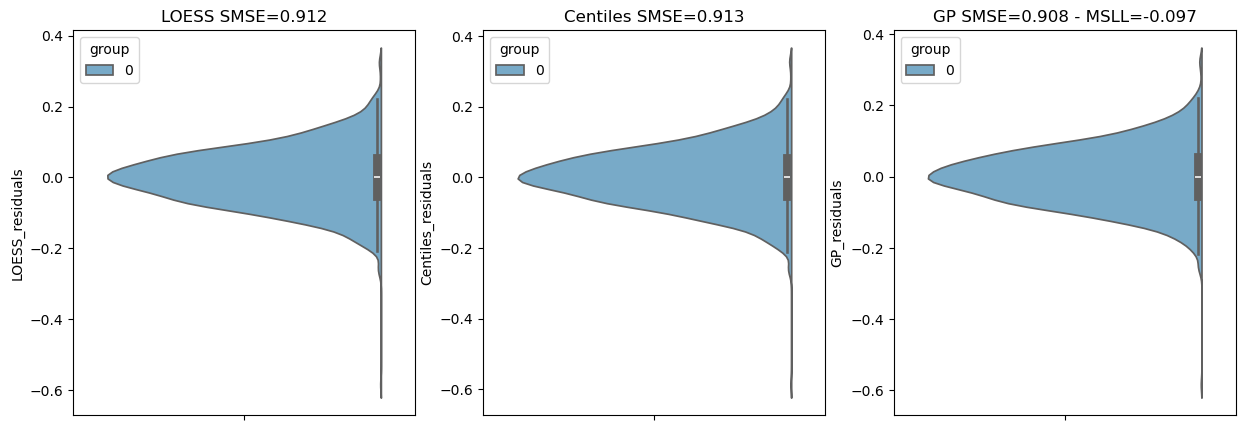

/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])
/home/yyang/miniconda3/lib/python3.12/site-packages/pynm/pynm.py:1047: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''])


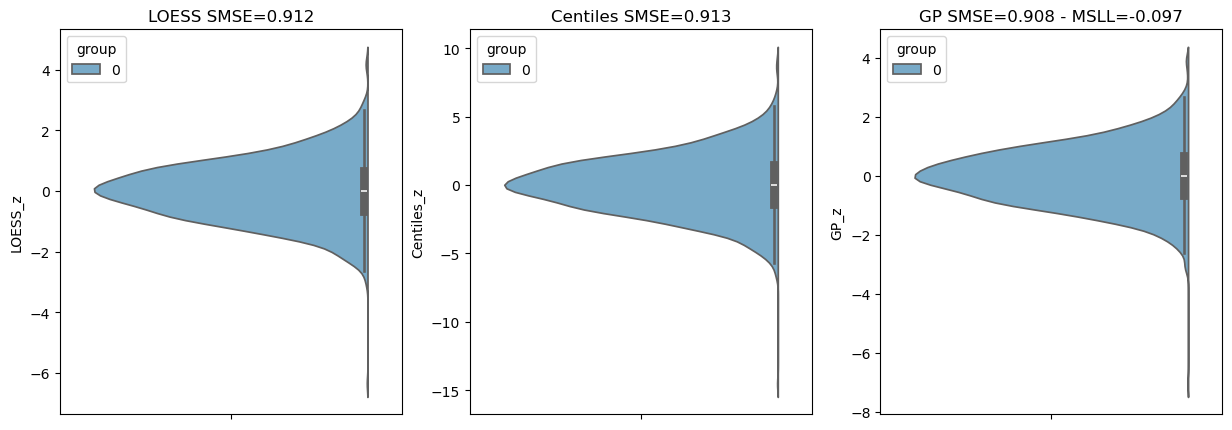

In [29]:
# Plot the data, model prediction, & 95% confidence interval
m.plot()

# Plot the residuals of the model (actual value - predicted value)
m.plot_res()

# Plot the z-scores of the model (model residuals / std deviation)
m.plot_z()